In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-10-28 21:46:28--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2024-10-28 21:46:29 (13.0 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


<ipython-input-19-b52162208325>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_expenses_age_group = dataset.groupby('age_group')['expenses'].mean().reset_index()


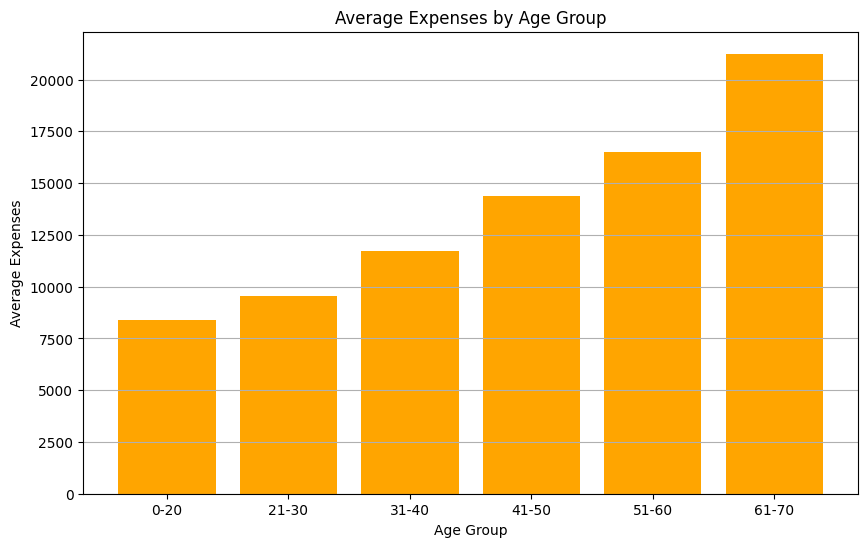

In [ ]:
# Age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)

# Bar plot of Average Expenses by Age Group
average_expenses_age_group = dataset.groupby('age_group')['expenses'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_expenses_age_group['age_group'], average_expenses_age_group['expenses'], color='orange')
plt.title('Average Expenses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()


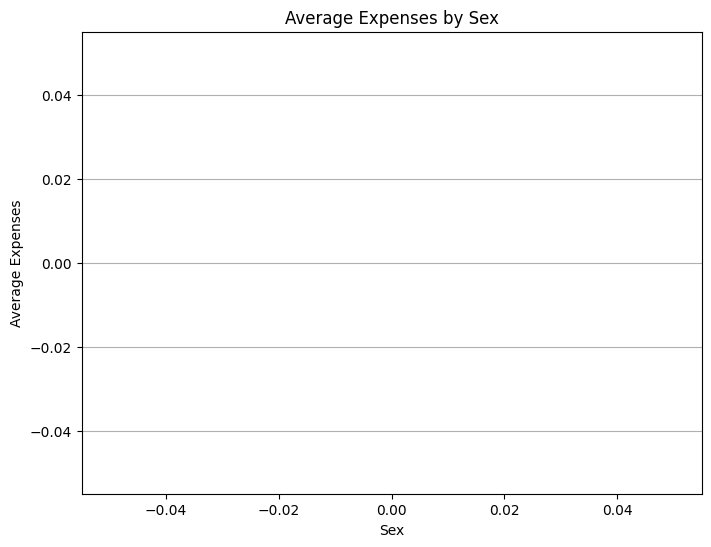

In [ ]:
# Bar plot of Average Expenses by Sex
average_expenses_sex = dataset.groupby('sex')['expenses'].mean().reset_index()
average_expenses_sex['sex'] = average_expenses_sex['sex'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(8, 6))
plt.bar(average_expenses_sex['sex'], average_expenses_sex['expenses'], color='lightgreen')
plt.title('Average Expenses by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()

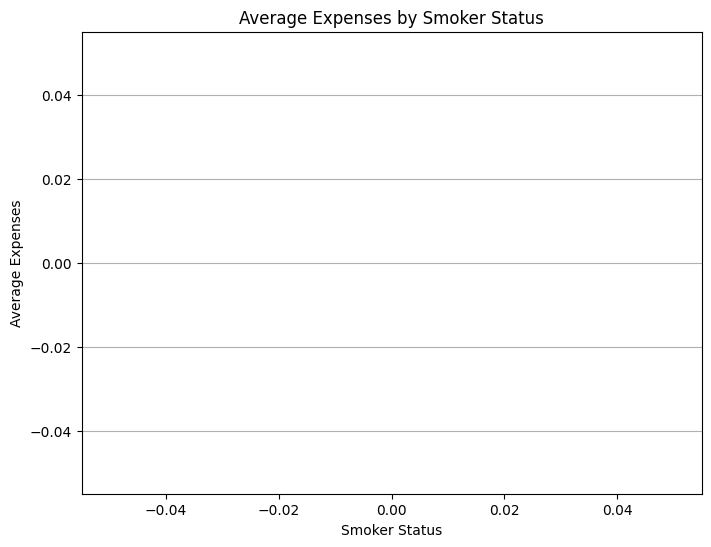

In [ ]:
# Bar plot of Average Expenses by Smoker Status
average_expenses_smoker = dataset.groupby('smoker')['expenses'].mean().reset_index()
average_expenses_smoker['smoker'] = average_expenses_smoker['smoker'].map({0: 'No', 1: 'Yes'})  # Mapping for clarity

plt.figure(figsize=(8, 6))
plt.bar(average_expenses_smoker['smoker'], average_expenses_smoker['expenses'], color='salmon')
plt.title('Average Expenses by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Average Expenses')
plt.grid(axis='y')
plt.show()

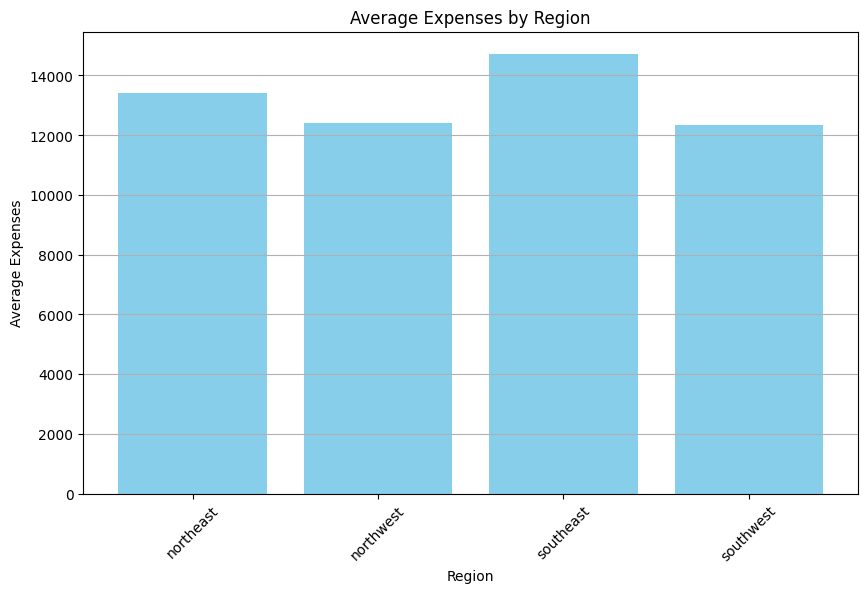

In [ ]:
# Bar plot of Average Expenses by Region
average_expenses_region = dataset.groupby('region')['expenses'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_expenses_region['region'], average_expenses_region['expenses'], color='skyblue')
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

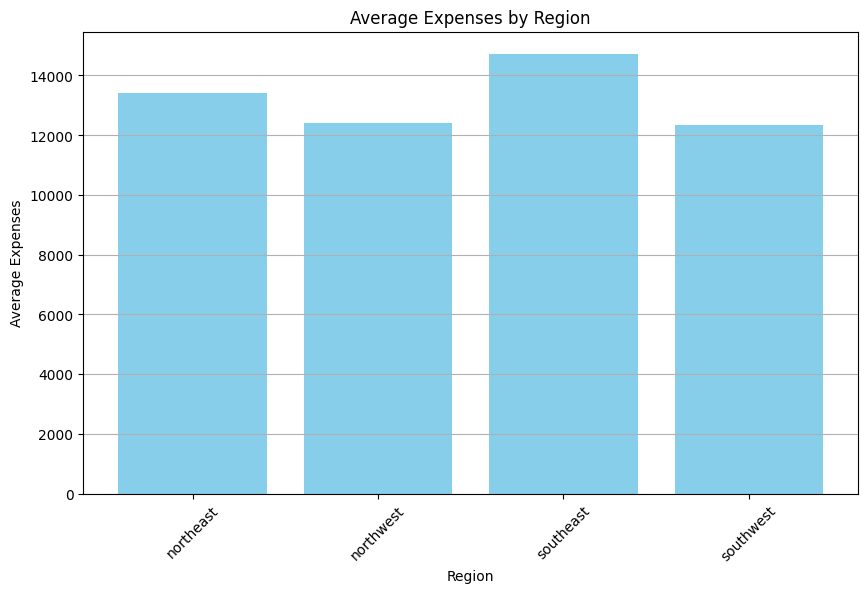

In [ ]:
# Bar plot of Average Expenses by Region
average_expenses_region = dataset.groupby('region')['expenses'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_expenses_region['region'], average_expenses_region['expenses'], color='skyblue')
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
dataset['smoker'] = dataset['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['sex'] = dataset['sex'].apply(lambda x: 1 if x == 'female' else 0)
print(dataset.copy())

      age  sex   bmi  children  smoker     region  expenses age_group
0      19    1  27.9         0       1  southwest  16884.92      0-20
1      18    0  33.8         1       0  southeast   1725.55      0-20
2      28    0  33.0         3       0  southeast   4449.46     21-30
3      33    0  22.7         0       0  northwest  21984.47     31-40
4      32    0  28.9         0       0  northwest   3866.86     31-40
...   ...  ...   ...       ...     ...        ...       ...       ...
1333   50    0  31.0         3       0  northwest  10600.55     51-60
1334   18    1  31.9         0       0  northeast   2205.98      0-20
1335   18    1  36.9         0       0  southeast   1629.83      0-20
1336   21    1  25.8         0       0  southwest   2007.95     21-30
1337   61    1  29.1         0       1  northwest  29141.36     61-70

[1338 rows x 8 columns]


9/9 - 0s - 6ms/step - loss: 2265.5107 - mae: 2265.5107 - mse: 24426106.0000
Testing set Mean Abs Error: 2265.51 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


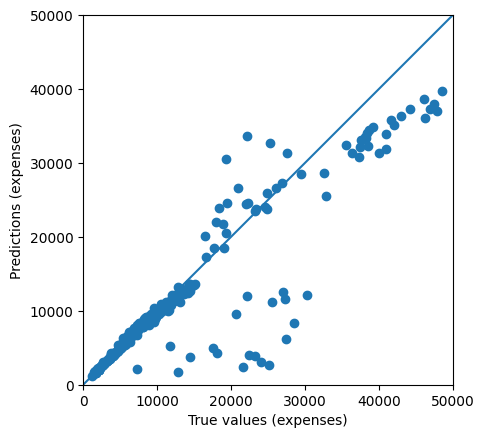

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
